C:\Users\cagil\AppData\Local\Temp\ipykernel_22672\1437955259.py:7: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc_VQE.u3(params[0],params[1],params[2],0)


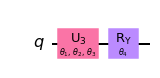

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import EfficientSU2
from qiskit import QuantumCircuit
qc_VQE=QuantumCircuit(1)
from qiskit.circuit import Parameter
params = [Parameter(r'$\theta_1$'), Parameter(r'$\theta_2$'), Parameter(r'$\theta_3$'),Parameter(r'$\theta_4$')]
qc_VQE.u3(params[0],params[1],params[2],0)
qc_VQE.ry(params[3],0)
qc_VQE.draw('mpl')


In [1]:
import numpy as np
import math as m
import cmath as cm
from numpy.linalg import eig
import pennylane as qml
import matplotlib.pyplot as plt

#initials
n=4
Qz = np.zeros((n,n))
Pz = np.zeros((n,n))
a = np.zeros((n,n))
adag = np.zeros((n,n))
for i,j in zip(range(n),range(1,n)):
        a[i][j] = m.sqrt(j)
        adag[j][i] = m.sqrt(j)
        
        
        
# Position basis
#Qpos Ppos
Qpos = np.zeros((n,n),np.complex_)
Ppos = np.zeros((n,n),np.complex_)
F = np.zeros((n,n),dtype=np.complex_)
Ft = np.zeros((n,n),dtype=np.complex_)
Ppos = np.zeros((n,n),dtype=np.complex_)

#Qpos Ppos
for l in range(n):
    Qpos[l][l] = np.sqrt(np.pi/(2*n)) * ((-n/2) + l)
    for k in range(n):
        F[l][k]=np.exp( (((2*np.pi*complex(0,1))*l*k)/n))/(np.sqrt(n))  

Ppos = np.matmul(Qpos,F) 
Ppos = np.matmul(F.conj().T,Ppos)       
aaaas = Ppos / ( np.sqrt(np.pi/(64*2)) )


#oscilatory basis
I=np.identity(n)
Posc = (1/(m.sqrt(2))) * (-(complex(0,1)))  * (a - adag)
Qosc = (1/(m.sqrt(2))) * (a + adag)

Q2=np.matmul(Qosc,Qosc)
Pcomplex=np.conjugate(Posc)
P2=np.matmul(Posc,Posc)

#Position basis 3D
Ip=np.identity(2)

x_ = np.kron( np.kron(Qpos,Ip) , Ip)
y_ = np.kron( np.kron(Ip,Qpos) , Ip)
z_ = np.kron( np.kron(Ip,Ip) , Qpos)

Ppos2 = np.matmul(Ppos,Ppos)

Px2_ = np.kron( np.kron(Ppos2,Ip) , Ip) 
Py2_ = np.kron( np.kron(Ip,Ppos2) , Ip)
Pz2_ = np.kron( np.kron(Ip,Ip) , Ppos2) 


#qiskit vqe calculation import libraries
from qiskit import Aer
from qiskit.opflow import X, Z, I, Y
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal
from qiskit.opflow import PauliExpectation

# Hamiltonian
#Which is Given in Planck units
G=1
mass=5
radius=1
HmtrxP = (Px2_/2 + Py2_/2 + Pz2_/2) 

Hp = ((0.19634954084936204) * X ^ I ^ I ^ I) + \
((0.3926990816987241)  * I ^ I ^ I ^ X ) + \
((0.3926990816987241)  * I ^ I ^ X ^ X) + \
((0.39269908169872414) * I ^ X ^ X ^ I) + \
((0.39269908169872414) * X ^ X ^ I ^ I) + \
((0.5890486225480861)  * I ^ I ^ X ^ I) + \
((0.5890486225480861)  * I ^ X ^ I ^ I) + \
((1.7671458676442584)  * I ^ I ^ I ^ I)


result_aer=[]
result_st=[]
result_t=[]
'''
for M in np.arange(1,15,1):
    Hmtrxcr = ( (0.5 * (1 + ((G*M)/(2*radius)) )**(1/4) ) * Hp )
'''

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import EfficientSU2


'''
def get_var_form(params):
    qr = QuantumRegister(1, name="q")
    cr = ClassicalRegister(1, name='c')
    qc = QuantumCircuit(qr, cr)
    qc.u3(params[0], params[1], params[2], qr[0])
    qc.ryparams[0], params[1], params[2], qr[0]()
    qc.measure(qr, cr[0])
    return qc
'''


'\ndef get_var_form(params):\n    qr = QuantumRegister(1, name="q")\n    cr = ClassicalRegister(1, name=\'c\')\n    qc = QuantumCircuit(qr, cr)\n    qc.u3(params[0], params[1], params[2], qr[0])\n    qc.ryparams[0], params[1], params[2], qr[0]()\n    qc.measure(qr, cr[0])\n    return qc\n'

C:\Users\cagil\anaconda3\envs\qcompmetu\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


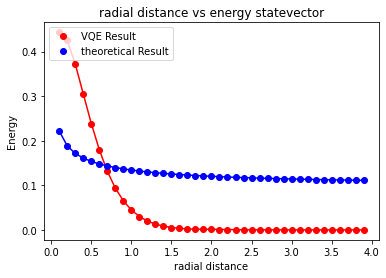

In [3]:
#SLSQP

result_aerslsqp=[]
result_stslsqp=[]
result_t=[]
for r in np.arange(0.1,4,0.1):
    #print(type(r))
    r = float(r)
    Hmtrxcm = (0.5 * (1 + ((G*mass)/(2*r)) )**(1/4) ) * Hp 
    
    
    Hp = Hmtrxcm
#SLSQP
    
    seed = 50
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    #ansatz =  EfficientSU2(4, reps=1)
    #ansatz = TwoLocal(4, ['rx','ry','rz'], 'cz', 'full', reps=1, insert_barriers=True)
    
    slsqp = SLSQP(maxiter=1000)
    
    qi = QuantumInstance(Aer.get_backend('aer_simulator'), seed_transpiler=seed, seed_simulator=seed)
    
    vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
    result = vqe.compute_minimum_eigenvalue(operator=Hp)
    #print(result.eigenvalue)
    result_aerslsqp.append(result.eigenvalue)
    
    optimizer_evals = result.optimizer_evals
    
    initial_pt = result.optimal_point
    
    algorithm_globals.random_seed = seed
    qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
    
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    #ansatz = TwoLocal(rotation_blocks='rx'+'ry'+'rz', entanglement_blocks='cx')
    #ansatz =  EfficientSU2(4, reps=1)
    #ansatz = TwoLocal(4, ['rx','ry','rz'], 'cx', 'full', reps=1, insert_barriers=True)

    
    
    slsqp = SLSQP(maxiter=1000)
    vqe = VQE(ansatz, optimizer=slsqp, initial_point=initial_pt, quantum_instance=qi)
    result1 = vqe.compute_minimum_eigenvalue(operator=Hp)
    #print(result1)
    optimizer_evals1 = result1.optimizer_evals
    #print()
    #print(f'optimizer_evals is {optimizer_evals1} with initial point versus {optimizer_evals} without it.')
    
    #print(result1.eigenvalue)
    result_stslsqp.append(result1.eigenvalue)


for r in np.arange(0.1,4,0.1):

    r = float(r)
    Hmtrxcm = (0.5 * (1 + ((G*mass)/(2*r)) )**(1/4) ) * (Px2_/2 + Py2_/2 + Pz2_/2) 
    #Theoretical calculation for eigenvalues
    e_val1,e_vec = eig(np.nan_to_num(Hmtrxcm))
    result_t.append(min(e_val1))
    



'''
 (0.09817477042468102) [X0 I1 I2 I3]
+ (0.19634954084936204) [I0 I1 I2 X3]
+ (0.19634954084936204) [I0 I1 X2 X3]
+ (0.19634954084936207) [I0 X1 X2 I3]
+ (0.19634954084936207) [X0 X1 I2 I3]
+ (0.29452431127404305) [I0 I1 X2 I3]
+ (0.29452431127404305) [I0 X1 I2 I3]
+ (0.8835729338221292) [I0 I1 I2 I3]
'''

#plot
x = np.arange(0.1,4,0.1)
y = result_stslsqp
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')

plt.legend(loc="upper left")
plt.title('radial distance vs energy statevector')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.show()

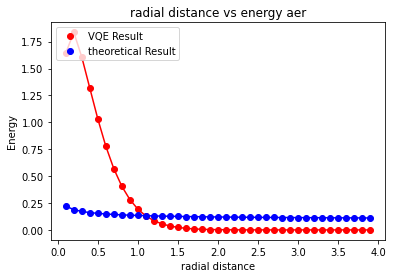

In [4]:
#plot
x = np.arange(0.1,4,0.1)
y = result_aerslsqp
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')

plt.legend(loc="upper left")
plt.title('radial distance vs energy aer')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.show()

C:\Users\cagil\AppData\Local\Temp\ipykernel_22672\2603560554.py:13: RuntimeWarning: invalid value encountered in power
  return a*(b + c/x )**(1/4)


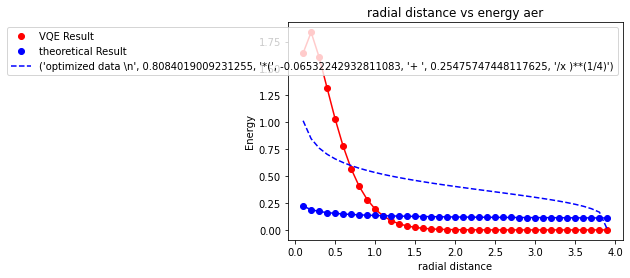

In [16]:
import numpy as np
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

x = np.arange(0.1,4,0.1)

# The coefficients are much bigger.
y = result_aerslsqp
yt = result_t

def test(x, a, b, c):
    return a*(b + c/x )**(1/4)

param, param_cov = curve_fit(test, x, y)

ans = param[0]*(param[1] + param[2]/x )**(1/4)
a , b , c = param[0] ,param[1], param[2]
#plt.plot(x, y, 'o', color ='red', label ="data")
#plt.plot(x, ans, '--', color ='blue', label ="optimized data")
#plot
x = np.arange(0.1,4,0.1)
y = result_aerslsqp
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')
plt.plot(x, ans, '--', color ='blue', label =("optimized data \n",a,"*(",b, "+ ",c,"/x )**(1/4)" ))
plt.legend(loc="upper left")
plt.title('radial distance vs energy aer')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.legend()
plt.show()


C:\Users\cagil\anaconda3\envs\qcompmetu\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


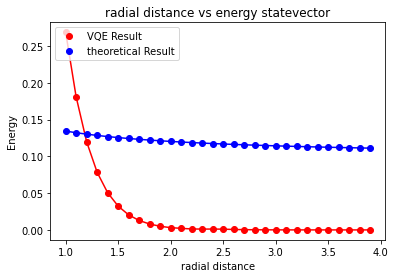

In [2]:
#SLSQP from 1

result_aerslsqp=[]
result_stslsqp=[]
result_t=[]
for r in np.arange(1,4,0.1):
    #print(type(r))
    r = float(r)
    Hmtrxcm = (0.5 * (1 + ((G*mass)/(2*r)) )**(1/4) ) * Hp 
    
    
    Hp = Hmtrxcm
#SLSQP
    
    seed = 50
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    #ansatz =  EfficientSU2(4, reps=1)
    #ansatz = TwoLocal(4, ['rx','ry','rz'], 'cz', 'full', reps=1, insert_barriers=True)
    
    slsqp = SLSQP(maxiter=1000)
    
    qi = QuantumInstance(Aer.get_backend('aer_simulator'), seed_transpiler=seed, seed_simulator=seed)
    
    vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
    result = vqe.compute_minimum_eigenvalue(operator=Hp)
    #print(result.eigenvalue)
    result_aerslsqp.append(result.eigenvalue)
    
    optimizer_evals = result.optimizer_evals
    
    initial_pt = result.optimal_point
    
    algorithm_globals.random_seed = seed
    qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
    
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    #ansatz = TwoLocal(rotation_blocks='rx'+'ry'+'rz', entanglement_blocks='cx')
    #ansatz =  EfficientSU2(4, reps=1)
    #ansatz = TwoLocal(4, ['rx','ry','rz'], 'cx', 'full', reps=1, insert_barriers=True)

    
    
    slsqp = SLSQP(maxiter=1000)
    vqe = VQE(ansatz, optimizer=slsqp, initial_point=initial_pt, quantum_instance=qi)
    result1 = vqe.compute_minimum_eigenvalue(operator=Hp)
    #print(result1)
    optimizer_evals1 = result1.optimizer_evals
    #print()
    #print(f'optimizer_evals is {optimizer_evals1} with initial point versus {optimizer_evals} without it.')
    
    #print(result1.eigenvalue)
    result_stslsqp.append(result1.eigenvalue)


for r in np.arange(1,4,0.1):

    r = float(r)
    Hmtrxcm = (0.5 * (1 + ((G*mass)/(2*r)) )**(1/4) ) * (Px2_/2 + Py2_/2 + Pz2_/2) 
    #Theoretical calculation for eigenvalues
    e_val1,e_vec = eig(np.nan_to_num(Hmtrxcm))
    result_t.append(min(e_val1))
    



'''
 (0.09817477042468102) [X0 I1 I2 I3]
+ (0.19634954084936204) [I0 I1 I2 X3]
+ (0.19634954084936204) [I0 I1 X2 X3]
+ (0.19634954084936207) [I0 X1 X2 I3]
+ (0.19634954084936207) [X0 X1 I2 I3]
+ (0.29452431127404305) [I0 I1 X2 I3]
+ (0.29452431127404305) [I0 X1 I2 I3]
+ (0.8835729338221292) [I0 I1 I2 I3]
'''

#plot
x = np.arange(1,4,0.1)
y = result_stslsqp
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')

plt.legend(loc="upper left")
plt.title('radial distance vs energy statevector')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.show()

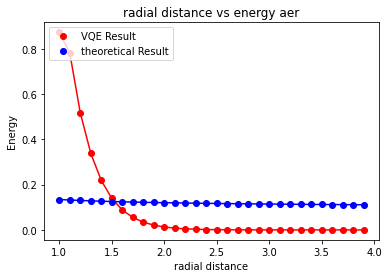

In [3]:
#plot
x = np.arange(1,4,0.1)
y = result_aerslsqp
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')

plt.legend(loc="upper left")
plt.title('radial distance vs energy aer')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

x = np.arange(1,4,0.1)

# The coefficients are much bigger.
y = result_aerslsqp
yt = result_t

def test(x, a, b, c):
    return a*(b + c/x )**(1/4)

param, param_cov = curve_fit(test, x, y)

ans = param[0]*(param[1] + param[2]/x )**(1/4)
a , b , c = param[0] ,param[1], param[2]
#plt.plot(x, y, 'o', color ='red', label ="data")
#plt.plot(x, ans, '--', color ='blue', label ="optimized data")
#plot
x = np.arange(0.1,4,0.1)
y = result_aerslsqp
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')
plt.plot(x, ans, '--', color ='blue', label =("optimized data \n",a,"*(",b, "+ ",c,"/x )**(1/4)" ))
plt.legend(loc="upper left")
plt.title('radial distance vs energy aer')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.legend()
plt.show()


C:\Users\cagil\anaconda3\envs\qcompmetu\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


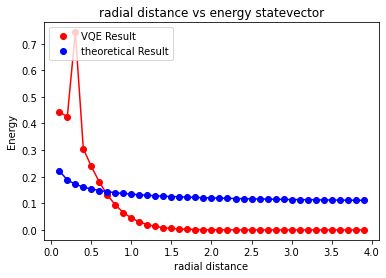

In [2]:
#SPSA
result_aerspsa=[]
result_stspsa=[]



for r in np.arange(0.1,4,0.1):
    #print(type(r))
    r = float(r)
    Hmtrxcm = (0.5 * (1 + ((G*mass)/(2*r)) )**(1/4) ) * Hp 
    
    
    Hp = Hmtrxcm
    #SPSA
    
    seed = 50
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    #ansatz =  EfficientSU2(4, reps=1)
    #ansatz = TwoLocal(4, ['rx','ry','rz'], 'cz', 'full', reps=1, insert_barriers=True)
    #ansatz = qc_VQE()
    
    slsqp = SPSA(maxiter=1000)
    
    qi = QuantumInstance(Aer.get_backend('aer_simulator'), seed_transpiler=seed, seed_simulator=seed)
    
    vqe = VQE(ansatz, optimizer=slsqp, quantum_instance=qi)
    result = vqe.compute_minimum_eigenvalue(operator=Hp)
    #print(result.eigenvalue)
    result_aerspsa.append(result.eigenvalue)
    
    optimizer_evals = result.optimizer_evals
    
    initial_pt = result.optimal_point
    
    algorithm_globals.random_seed = seed
    qi = QuantumInstance(Aer.get_backend('statevector_simulator'), seed_transpiler=seed, seed_simulator=seed)
    
    ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz')
    #ansatz = TwoLocal(rotation_blocks='rx'+'ry'+'rz', entanglement_blocks='cx')
    #ansatz =  EfficientSU2(4, reps=1)
    #ansatz = TwoLocal(4, ['rx','ry','rz'], 'cx', 'full', reps=1, insert_barriers=True)
    #ansatz = qc_VQE()

    
    
    slsqp = SPSA(maxiter=1000)
    vqe = VQE(ansatz, optimizer=slsqp, initial_point=initial_pt, quantum_instance=qi)
    result1 = vqe.compute_minimum_eigenvalue(operator=Hp)
    #print(result1)
    optimizer_evals1 = result1.optimizer_evals
    #print()
    #print(f'optimizer_evals is {optimizer_evals1} with initial point versus {optimizer_evals} without it.')
    
    #print(result1.eigenvalue)
    result_stspsa.append(result1.eigenvalue)


for r in np.arange(0.1,4,0.1):

    r = float(r)
    Hmtrxcm = (0.5 * (1 + ((G*mass)/(2*r)) )**(1/4) ) * (Px2_/2 + Py2_/2 + Pz2_/2) 
    #Theoretical calculation for eigenvalues
    e_val1,e_vec = eig(np.nan_to_num(Hmtrxcm))
    result_t.append(min(e_val1))
    



'''
 (0.09817477042468102) [X0 I1 I2 I3]
+ (0.19634954084936204) [I0 I1 I2 X3]
+ (0.19634954084936204) [I0 I1 X2 X3]
+ (0.19634954084936207) [I0 X1 X2 I3]
+ (0.19634954084936207) [X0 X1 I2 I3]
+ (0.29452431127404305) [I0 I1 X2 I3]
+ (0.29452431127404305) [I0 X1 I2 I3]
+ (0.8835729338221292) [I0 I1 I2 I3]
'''

#plot
x = np.arange(0.1,4,0.1)
y = result_stspsa
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')

plt.legend(loc="upper left")
plt.title('radial distance vs energy statevector')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.show()

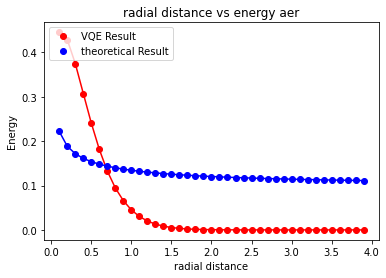

In [3]:
#plot
x = np.arange(0.1,4,0.1)
y = result_aerspsa
yt = result_t
plt.plot(x,y,'ro',label='VQE Result')
plt.plot(x,y,'-r')
plt.plot(x,yt,'bo',label='theoretical Result')
plt.plot(x,yt,'-b')

plt.legend(loc="upper left")
plt.title('radial distance vs energy aer')
plt.xlabel('radial distance')
plt.ylabel('Energy')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

x = np.arange(0.1,4,0.1)

# The coefficients are much bigger.
y = result_st
yt = result_t

def test(x, a, b):
	return y = a*(b + c/x )**(1/4)

param, param_cov = curve_fit(test, x, y)

print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

ans = (param[0]*(np.sin(param[1]*x)))

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()
